# 2023-02-15

In [35]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [1]:
!pip install pykrx
!pip install -U finance-datareader

In [3]:
from pykrx import stock
import FinanceDataReader as fdr
import pandas as pd

In [8]:
# ETF명 들을 StockListing하여 변수에 저장

ETF_name = fdr.StockListing('ETF/KR')
ETF_name.head()

,Symbol,Name
0,069500,KODEX 200
1,357870,TIGER CD금리투자KIS(합성)
2,371460,TIGER 차이나전기차SOLACTIVE
3,423160,KODEX KOFR금리액티브(합성)
4,252670,KODEX 200선물인버스2X


In [9]:
# 관심 ETF종목 선택

ETF_list = ['KODEX 게임산업', 'KBSTAR 헬스케어', 'TIGER 코스피대형주']

In [17]:
# 원본 데이터와 비교하여 'Name'이 일치하는 데이터 가져오기

ETF = ETF_name[ETF_name['Name'].isin(ETF_list)]
ETF

,Symbol,Name
325,300950,KODEX 게임산업
583,277640,TIGER 코스피대형주
606,253280,KBSTAR 헬스케어


In [32]:
ETF['Name']

325      KODEX 게임산업
583    TIGER 코스피대형주
606     KBSTAR 헬스케어
Name: Name, dtype: object

In [21]:
# 가격 조회 후 하나의 데이터프레임에 저장

df = fdr.DataReader('300950', '2021-01-01')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,13224,13334,13071,13319,36012,0.014317
2021-01-05,13309,13472,13184,13474,33166,0.011638
2021-01-06,13537,13591,13204,13250,28790,-0.016625
2021-01-07,13279,13329,13229,13259,15957,0.000679
2021-01-08,13407,13606,13204,13537,39460,0.020967
...,...,...,...,...,...,...
2023-02-09,8820,8820,8490,8650,127077,-0.019830
2023-02-10,8580,8600,8365,8395,63286,-0.029480
2023-02-13,8455,8455,8175,8235,50783,-0.019059


In [47]:
# 빈 데이터를 만들고 iterrows()를 활용해 원본 데이터를 불러와 새로운 컬럼을 만들고 concat하여 붙인다.

empty_df = pd.DataFrame()

for idx, values in ETF.iterrows():
    df = fdr.DataReader(values['Symbol'], '2021-01-01')
    df['Name'] = values['Name']
    empty_df = pd.concat([empty_df, df], axis = 0)
empty_df

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2021-01-04,13224,13334,13071,13319,36012,0.014317,KODEX 게임산업
2021-01-05,13309,13472,13184,13474,33166,0.011638,KODEX 게임산업
2021-01-06,13537,13591,13204,13250,28790,-0.016625,KODEX 게임산업
2021-01-07,13279,13329,13229,13259,15957,0.000679,KODEX 게임산업
2021-01-08,13407,13606,13204,13537,39460,0.020967,KODEX 게임산업
...,...,...,...,...,...,...,...
2023-02-09,10505,10590,10505,10555,406,-0.000947,KBSTAR 헬스케어
2023-02-10,10465,10465,10390,10440,15249,-0.010895,KBSTAR 헬스케어
2023-02-13,10380,10415,10340,10380,857,-0.005747,KBSTAR 헬스케어


In [46]:
empty_df['Name'].unique()

array(['KODEX 게임산업', 'TIGER 코스피대형주', 'KBSTAR 헬스케어'], dtype=object)

In [50]:
subset_etf = empty_df.copy()
subset_etf

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2021-01-04,13224,13334,13071,13319,36012,0.014317,KODEX 게임산업
2021-01-05,13309,13472,13184,13474,33166,0.011638,KODEX 게임산업
2021-01-06,13537,13591,13204,13250,28790,-0.016625,KODEX 게임산업
2021-01-07,13279,13329,13229,13259,15957,0.000679,KODEX 게임산업
2021-01-08,13407,13606,13204,13537,39460,0.020967,KODEX 게임산업
...,...,...,...,...,...,...,...
2023-02-09,10505,10590,10505,10555,406,-0.000947,KBSTAR 헬스케어
2023-02-10,10465,10465,10390,10440,15249,-0.010895,KBSTAR 헬스케어
2023-02-13,10380,10415,10340,10380,857,-0.005747,KBSTAR 헬스케어


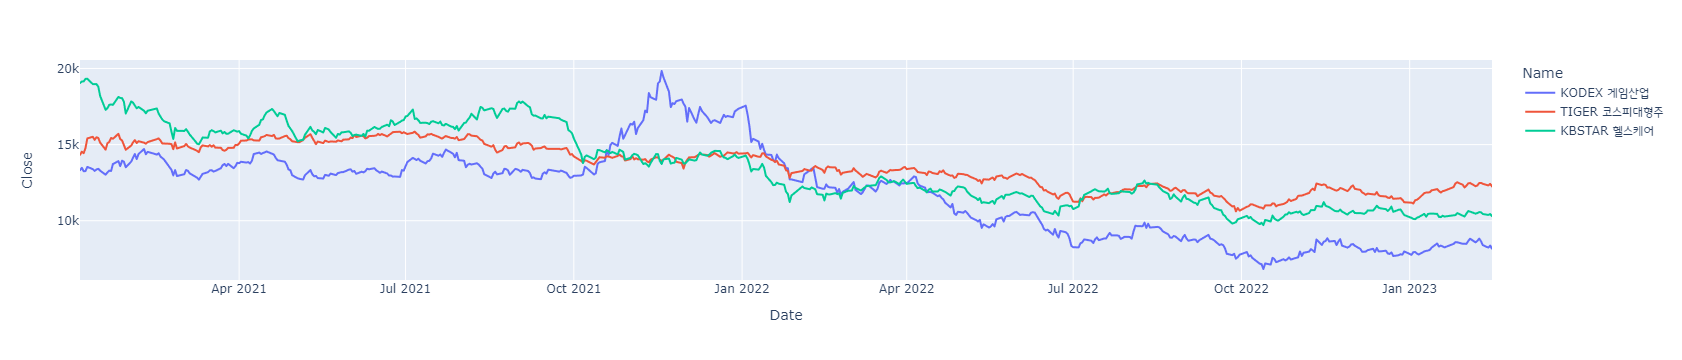

In [52]:
# subset_etf - line plot으로 시각화

import plotly.express as px

fig = px.line(subset_etf, x=subset_etf.index, y='Close', color='Name')
# fig.update_yaxes(autorange = 'reversed')                        # 그래프를 상하반전 시킴
fig.show()

In [54]:
# 지수화하여 시각화 하기 (pivot_table을 이용해 재구조화하여 지수화 하기 편하도록 데이터프레임을 가공)

etf = pd.pivot_table(index = subset_etf.index, columns = 'Name', values = 'Close', data = subset_etf)
etf

Name,KBSTAR 헬스케어,KODEX 게임산업,TIGER 코스피대형주
Date,,,
2021-01-04,19037,13319,14328
2021-01-05,19146,13474,14535
2021-01-06,19151,13250,14434
2021-01-07,19315,13259,14775
2021-01-08,19325,13537,15405
...,...,...,...
2023-02-09,10555,8650,12480
2023-02-10,10440,8395,12420
2023-02-13,10380,8235,12320


In [58]:
# 특정 시점부터의 변화를 알아보기 위해 시작데이터로 나눠주고 100을 곱해줌

etf_index = (etf / etf.iloc[0]) * 100
etf_index

Name,KBSTAR 헬스케어,KODEX 게임산업,TIGER 코스피대형주
Date,,,
2021-01-04,100.000000,100.000000,100.000000
2021-01-05,100.572569,101.163751,101.444724
2021-01-06,100.598834,99.481943,100.739810
2021-01-07,101.460314,99.549516,103.119765
2021-01-08,101.512843,101.636760,107.516750
...,...,...,...
2023-02-09,55.444660,64.944816,87.102178
2023-02-10,54.840574,63.030258,86.683417
2023-02-13,54.525398,61.828966,85.985483


In [59]:
# 시각화를 위해 melt

melt_etf_index = etf_index.reset_index().melt(id_vars = 'Date')
melt_etf_index

,Date,Name,value
0,2021-01-04,KBSTAR 헬스케어,100.000000
1,2021-01-05,KBSTAR 헬스케어,100.572569
2,2021-01-06,KBSTAR 헬스케어,100.598834
3,2021-01-07,KBSTAR 헬스케어,101.460314
4,2021-01-08,KBSTAR 헬스케어,101.512843
...,...,...,...
1570,2023-02-09,TIGER 코스피대형주,87.102178
1571,2023-02-10,TIGER 코스피대형주,86.683417
1572,2023-02-13,TIGER 코스피대형주,85.985483
1573,2023-02-14,TIGER 코스피대형주,86.683417


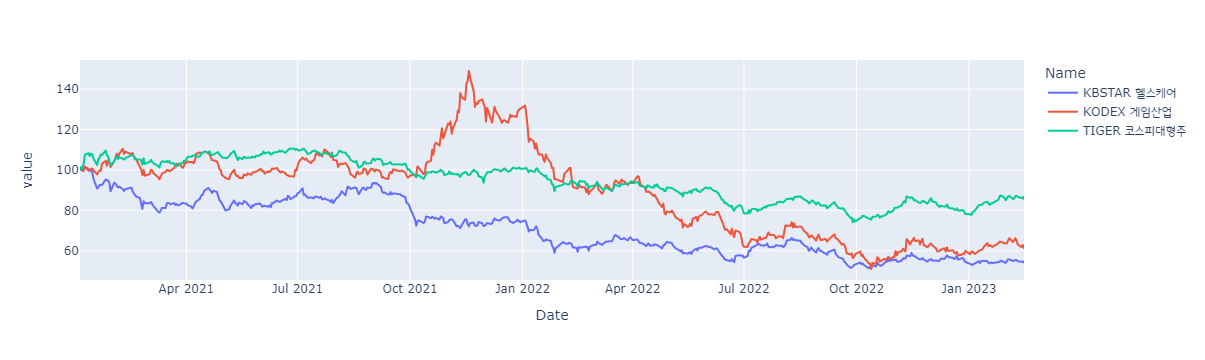

In [60]:
# 지수화 한 데이터를 line plot으로 시각화

fig = px.line(melt_etf_index, x='Date', y='value', color='Name')
fig.show()

## 종목구성 비교

In [61]:
ETF

,Symbol,Name
325,300950,KODEX 게임산업
583,277640,TIGER 코스피대형주
606,253280,KBSTAR 헬스케어


In [63]:
# 종목을 구성하는 데이터 불러오기

df = stock.get_etf_portfolio_deposit_file('300950')
df.head()

,계약수,금액,비중
티커,,,
036570,426.0,179559000,21.40
259960,885.0,154255500,18.65
293490,1890.0,89397000,10.65
251270,1423.0,86376100,10.04
263750,1681.0,78250550,9.08


In [67]:
ETF_portpolio = pd.DataFrame()

for idx, values in ETF.iterrows():
    df = stock.get_etf_portfolio_deposit_file(values['Symbol'])
    df['Name'] = values['Name']
    ETF_portpolio = pd.concat([ETF_portpolio, df], axis = 0)

In [66]:
ETF_portpolio['Name'].unique()

array(['KODEX 게임산업', 'TIGER 코스피대형주', 'KBSTAR 헬스케어'], dtype=object)

In [68]:
ETF_portpolio.head()

,계약수,금액,비중,Name
티커,,,,
036570,426.0,179559000,21.360001,KODEX 게임산업
259960,885.0,154255500,18.660000,KODEX 게임산업
293490,1890.0,89397000,10.660000,KODEX 게임산업
251270,1423.0,86376100,10.050000,KODEX 게임산업
263750,1681.0,78250550,9.080000,KODEX 게임산업


In [76]:
# 종목 수

stock_count = ETF_portpolio['Name'].value_counts()
stock_count

TIGER 코스피대형주    100
KBSTAR 헬스케어      36
KODEX 게임산업       23
Name: Name, dtype: int64

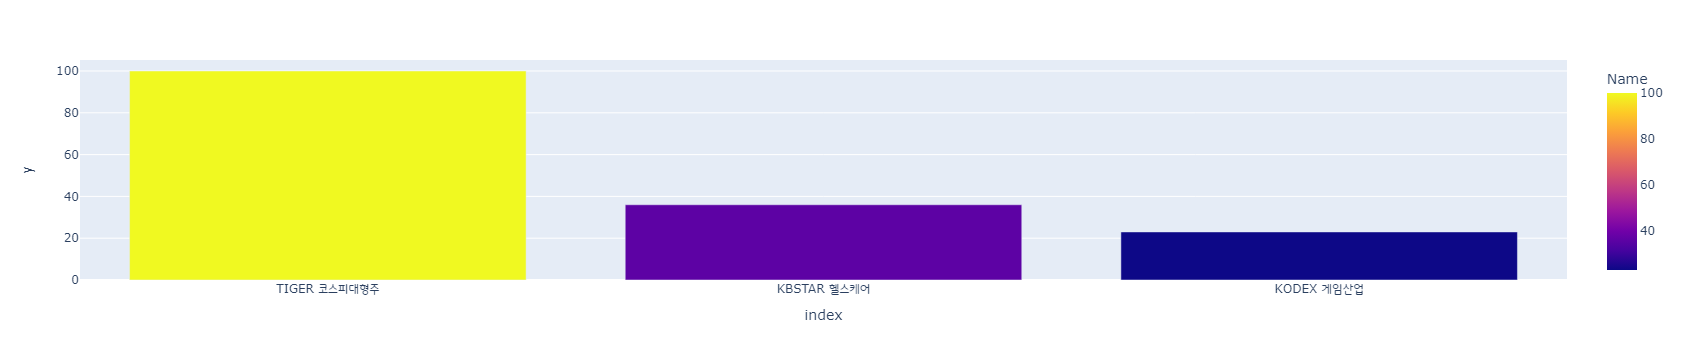

In [79]:
# 종목 수 시각화

fig = px.bar(stock_count, x = stock_count.index, y=stock_count.values, color='Name')
fig.show()

## 내부 구성 종목들의 비율

In [81]:
cor_list = fdr.StockListing('KRX')[['Code', 'Name']]
cor_list.head()

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,006400,삼성SDI


In [91]:
ETF_portpolio

,계약수,금액,비중,Name
티커,,,,
036570,426.0,179559000,21.360001,KODEX 게임산업
259960,885.0,154255500,18.660000,KODEX 게임산업
293490,1890.0,89397000,10.660000,KODEX 게임산업
251270,1423.0,86376100,10.050000,KODEX 게임산업
263750,1681.0,78250550,9.080000,KODEX 게임산업
...,...,...,...,...
003850,392.0,3590720,0.690000,KBSTAR 헬스케어
033270,119.0,2725100,0.530000,KBSTAR 헬스케어
307750,254.0,1605280,0.310000,KBSTAR 헬스케어


In [82]:
# cor_list를 index값을 key로 가지는 딕셔너리로 변환

cor_list_dict = cor_list.set_index('Code').to_dict()

In [97]:
# ETF_portpolio 데이터프레임과 cor_list를 merge로 합친 후 컬럼명을 변경

merge_cor_name = pd.merge(left = cor_list, right = ETF_portpolio, left_on = 'Code', right_on = ETF_portpolio.index)
merge_cor_name.columns = ['티커', '종목명', '계약수', '금액', '비중', 'ETF_Name']
merge_cor_name.head()

,티커,종목명,계약수,금액,비중,ETF_Name
0,005930,삼성전자,2348.0,148393600,23.809999,TIGER 코스피대형주
1,373220,LG에너지솔루션,92.0,48300000,8.010000,TIGER 코스피대형주
2,000660,SK하이닉스,286.0,26712400,4.290000,TIGER 코스피대형주
3,207940,삼성바이오로직스,28.0,22540000,3.630000,TIGER 코스피대형주
4,207940,삼성바이오로직스,63.0,50715000,9.740000,KBSTAR 헬스케어


In [103]:
# 비중이 너무 작은 값들은 결과에 영향을 미치지 않는 한에서 비중이 1프로 이상인 것들만 다시 변수에 대입

merge_cor_name = merge_cor_name[merge_cor_name['비중'] > 1]

In [211]:
# pivot_table -> NaN값을 0으로 대체

etf_weight = pd.pivot_table(index = '종목명', columns = 'ETF_Name', values = '비중', data = merge_cor_name)
etf_weight.head()

ETF_Name,KBSTAR 헬스케어,KODEX 게임산업,TIGER 코스피대형주
종목명,,,
HK이노엔,1.47,NaN,NaN
HLB,8.09,NaN,NaN
KB금융,NaN,NaN,1.34
LG에너지솔루션,NaN,NaN,8.01
LG전자,NaN,NaN,1.18


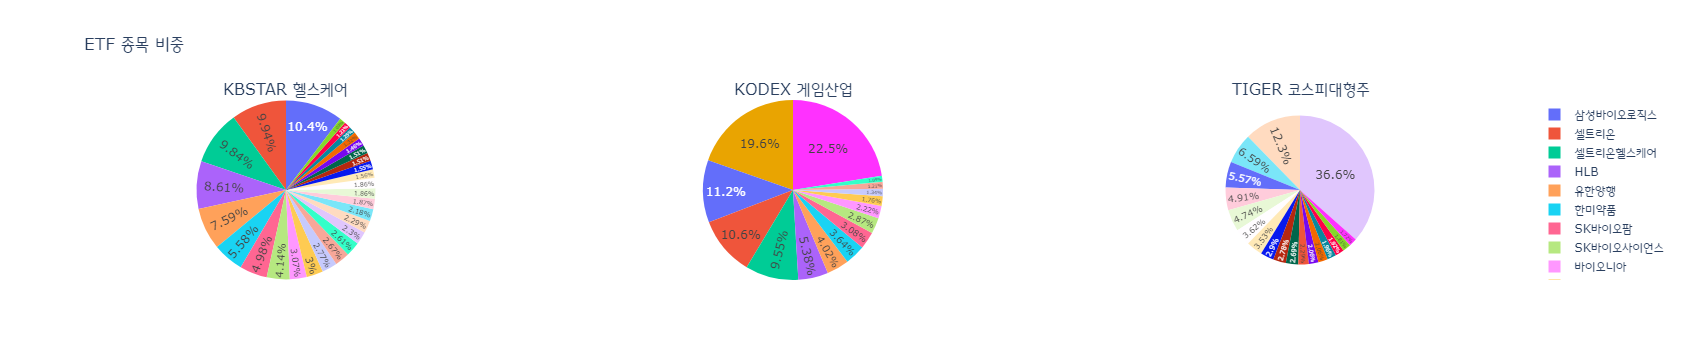

In [133]:
# 시각화 (NaN값을 제외하고 그려짐)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = etf_weight.index
fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type' : 'domain'}]],
                    subplot_titles=etf_weight.columns)

for row_num, etf_name in enumerate(etf_weight.columns):    
    fig.add_trace(go.Pie(labels=labels, values=etf_weight[etf_name], scalegroup='one'), 1, row_num+1)
    
fig.update_layout(title_text='ETF 종목 비중')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12)
fig.show()

In [135]:
# 종목 비중의 상관관계 (0으로 NaN값을 채움)

etf_weight.fillna(0).corr()

ETF_Name,KBSTAR 헬스케어,KODEX 게임산업,TIGER 코스피대형주
ETF_Name,,,
KBSTAR 헬스케어,1.000000,-0.244796,-0.111299
KODEX 게임산업,-0.244796,1.000000,-0.129144
TIGER 코스피대형주,-0.111299,-0.129144,1.000000


In [143]:
subset_etf

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2021-01-04,13224,13334,13071,13319,36012,0.014317,KODEX 게임산업
2021-01-05,13309,13472,13184,13474,33166,0.011638,KODEX 게임산업
2021-01-06,13537,13591,13204,13250,28790,-0.016625,KODEX 게임산업
2021-01-07,13279,13329,13229,13259,15957,0.000679,KODEX 게임산업
2021-01-08,13407,13606,13204,13537,39460,0.020967,KODEX 게임산업
...,...,...,...,...,...,...,...
2023-02-09,10505,10590,10505,10555,406,-0.000947,KBSTAR 헬스케어
2023-02-10,10465,10465,10390,10440,15249,-0.010895,KBSTAR 헬스케어
2023-02-13,10380,10415,10340,10380,857,-0.005747,KBSTAR 헬스케어


In [152]:
# 종목별 종가의 상관관계 - pivot_table로 데이터프레임 변환

etf_close = pd.pivot_table(index = 'Date', columns = 'Name', values = 'Close', data = subset_etf)
etf_close

Name,KBSTAR 헬스케어,KODEX 게임산업,TIGER 코스피대형주
Date,,,
2021-01-04,19037,13319,14328
2021-01-05,19146,13474,14535
2021-01-06,19151,13250,14434
2021-01-07,19315,13259,14775
2021-01-08,19325,13537,15405
...,...,...,...
2023-02-09,10555,8650,12480
2023-02-10,10440,8395,12420
2023-02-13,10380,8235,12320


In [153]:
# 상관관계를 구하고

etf_cor_close = etf_close.corr()
etf_cor_close

Name,KBSTAR 헬스케어,KODEX 게임산업,TIGER 코스피대형주
Name,,,
KBSTAR 헬스케어,1.000000,0.716796,0.928702
KODEX 게임산업,0.716796,1.000000,0.809383
TIGER 코스피대형주,0.928702,0.809383,1.000000


In [154]:
# 히트맵처럼 프레임에 색을 입혀 시각화

etf_cor_close.style.background_gradient(cmap='coolwarm')

Name,KBSTAR 헬스케어,KODEX 게임산업,TIGER 코스피대형주
Name,,,
KBSTAR 헬스케어,1.000000,0.716796,0.928702
KODEX 게임산업,0.716796,1.000000,0.809383
TIGER 코스피대형주,0.928702,0.809383,1.000000


# 백테스팅

In [156]:
!pip install finance-datareader

In [159]:
import FinanceDataReader as fdr
df = fdr.DataReader('138040', '2003')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2011-05-13,6161,6161,5241,5242,428994,NaN
2011-05-16,4464,4464,4464,4465,487412,-0.148226
2011-05-17,3938,4056,3796,3796,12268654,-0.149832
2011-05-18,3881,3895,3706,3730,6188170,-0.017387
2011-05-19,3739,3763,3194,3280,6181312,-0.120643


<AxesSubplot: xlabel='Date'>

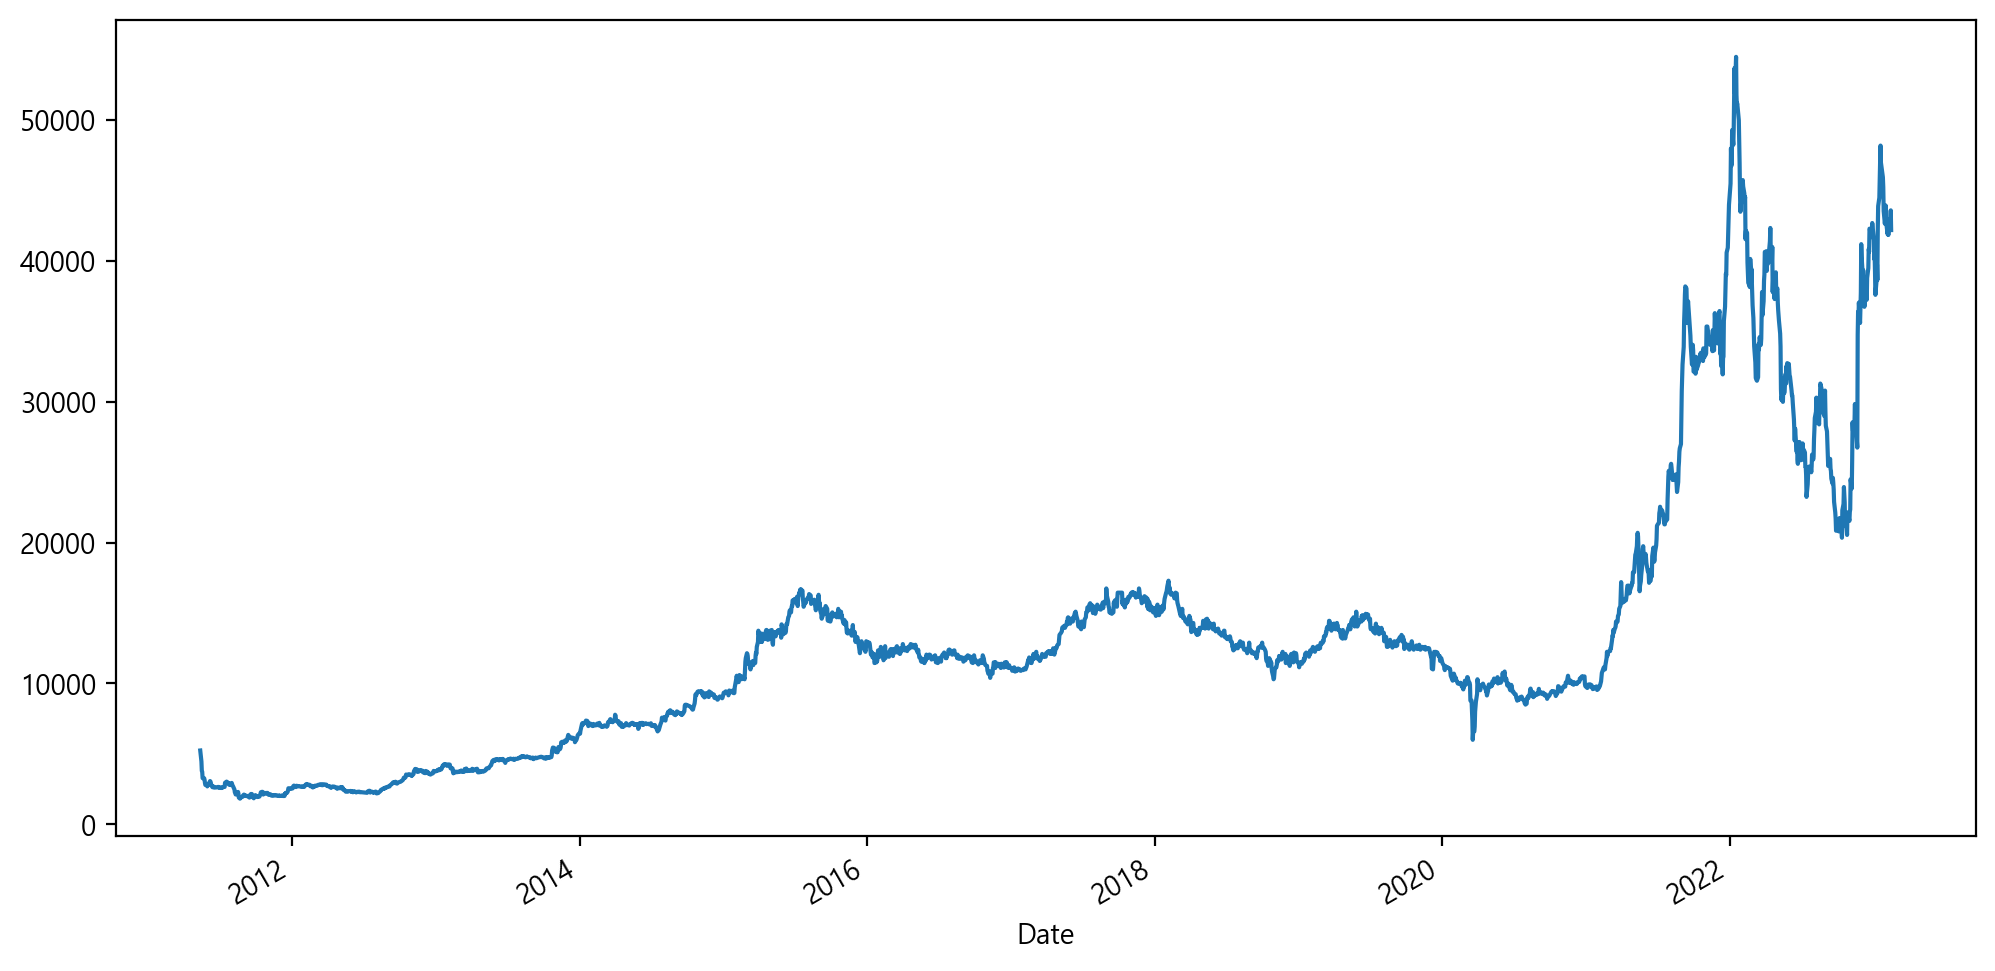

In [161]:
# 종가 시각화

df['Close'].plot(figsize=(12, 6))

In [162]:
# 누적 수익률 

df['cum_ror'] = (1 + df['Change']).cumprod() - 1
df.head()

,Open,High,Low,Close,Volume,Change,cum_ror
Date,,,,,,,
2011-05-13,6161,6161,5241,5242,428994,NaN,NaN
2011-05-16,4464,4464,4464,4465,487412,-0.148226,-0.148226
2011-05-17,3938,4056,3796,3796,12268654,-0.149832,-0.275849
2011-05-18,3881,3895,3706,3730,6188170,-0.017387,-0.288440
2011-05-19,3739,3763,3194,3280,6181312,-0.120643,-0.374285


## 성과분석
 - 연평균 복리 수익률(CAGR)
 - 최대 낙폭(MDD)
 - 변동성(valaility)
 - 샤프 지수(Sharpe ratio)

### 1. 연평균 복리 수익률(CAGR)

In [164]:
# CAGR = (1 + 누적수익률)**(1 / 투자년도) - 1

누적수익률 = df['cum_ror'].iloc[-1]

start_date = df.index[0]
end_date = df.index[-1]

투자년도 = (end_date - start_date).days / 365                  # 끝 날짜에서 시작날짜를 빼준 값을 timedelta방식으로 .days

CAGR = (1 + 누적수익률)**(1 / 투자년도) - 1
CAGR

0.19387972197559877

### 2. 최대 낙폭(MDD)

<AxesSubplot: xlabel='Date'>

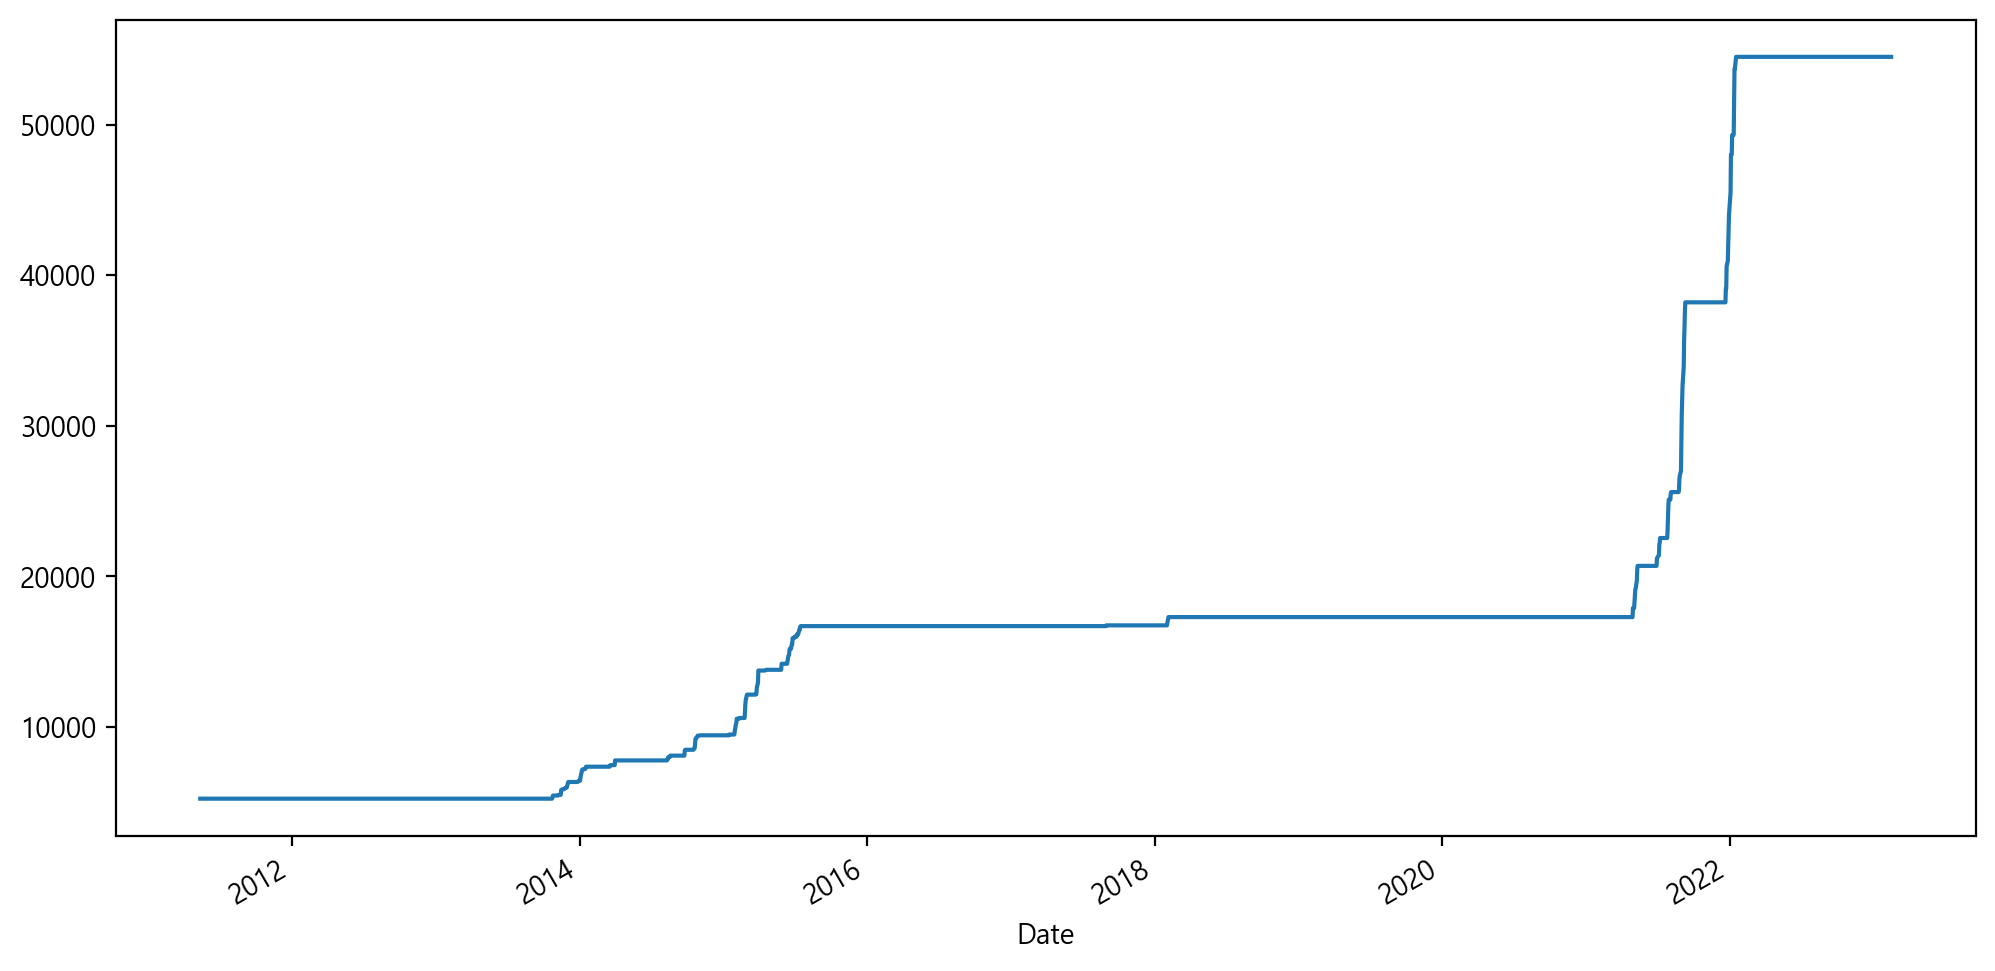

In [165]:
# 누적 최대값을 시각화

df['cum_max'] = df['Close'].cummax()     # 누적 최대값
df['cum_max'].plot(figsize = (12, 6))

In [168]:
# 최고점에서 얼마나 떨어졌는지의 하락율을 구함

df['최대값에서하락율'] = (df['Close'] / df['cum_max']) - 1
df

,Open,High,Low,Close,Volume,Change,cum_ror,cum_max,최대값에서하락률,최대값에서하락율
Date,,,,,,,,,,
2011-05-13,6161,6161,5241,5242,428994,NaN,NaN,5242,0.000000,0.000000
2011-05-16,4464,4464,4464,4465,487412,-0.148226,-0.148226,5242,-0.148226,-0.148226
2011-05-17,3938,4056,3796,3796,12268654,-0.149832,-0.275849,5242,-0.275849,-0.275849
2011-05-18,3881,3895,3706,3730,6188170,-0.017387,-0.288440,5242,-0.288440,-0.288440
2011-05-19,3739,3763,3194,3280,6181312,-0.120643,-0.374285,5242,-0.374285,-0.374285
...,...,...,...,...,...,...,...,...,...,...
2023-02-09,41600,43050,41500,42950,405455,0.026284,7.193438,54500,-0.211927,-0.211927
2023-02-10,43500,43500,42150,42500,202558,-0.010477,7.107593,54500,-0.220183,-0.220183
2023-02-13,42250,43000,41800,42950,233884,0.010588,7.193438,54500,-0.211927,-0.211927


<AxesSubplot: xlabel='Date'>

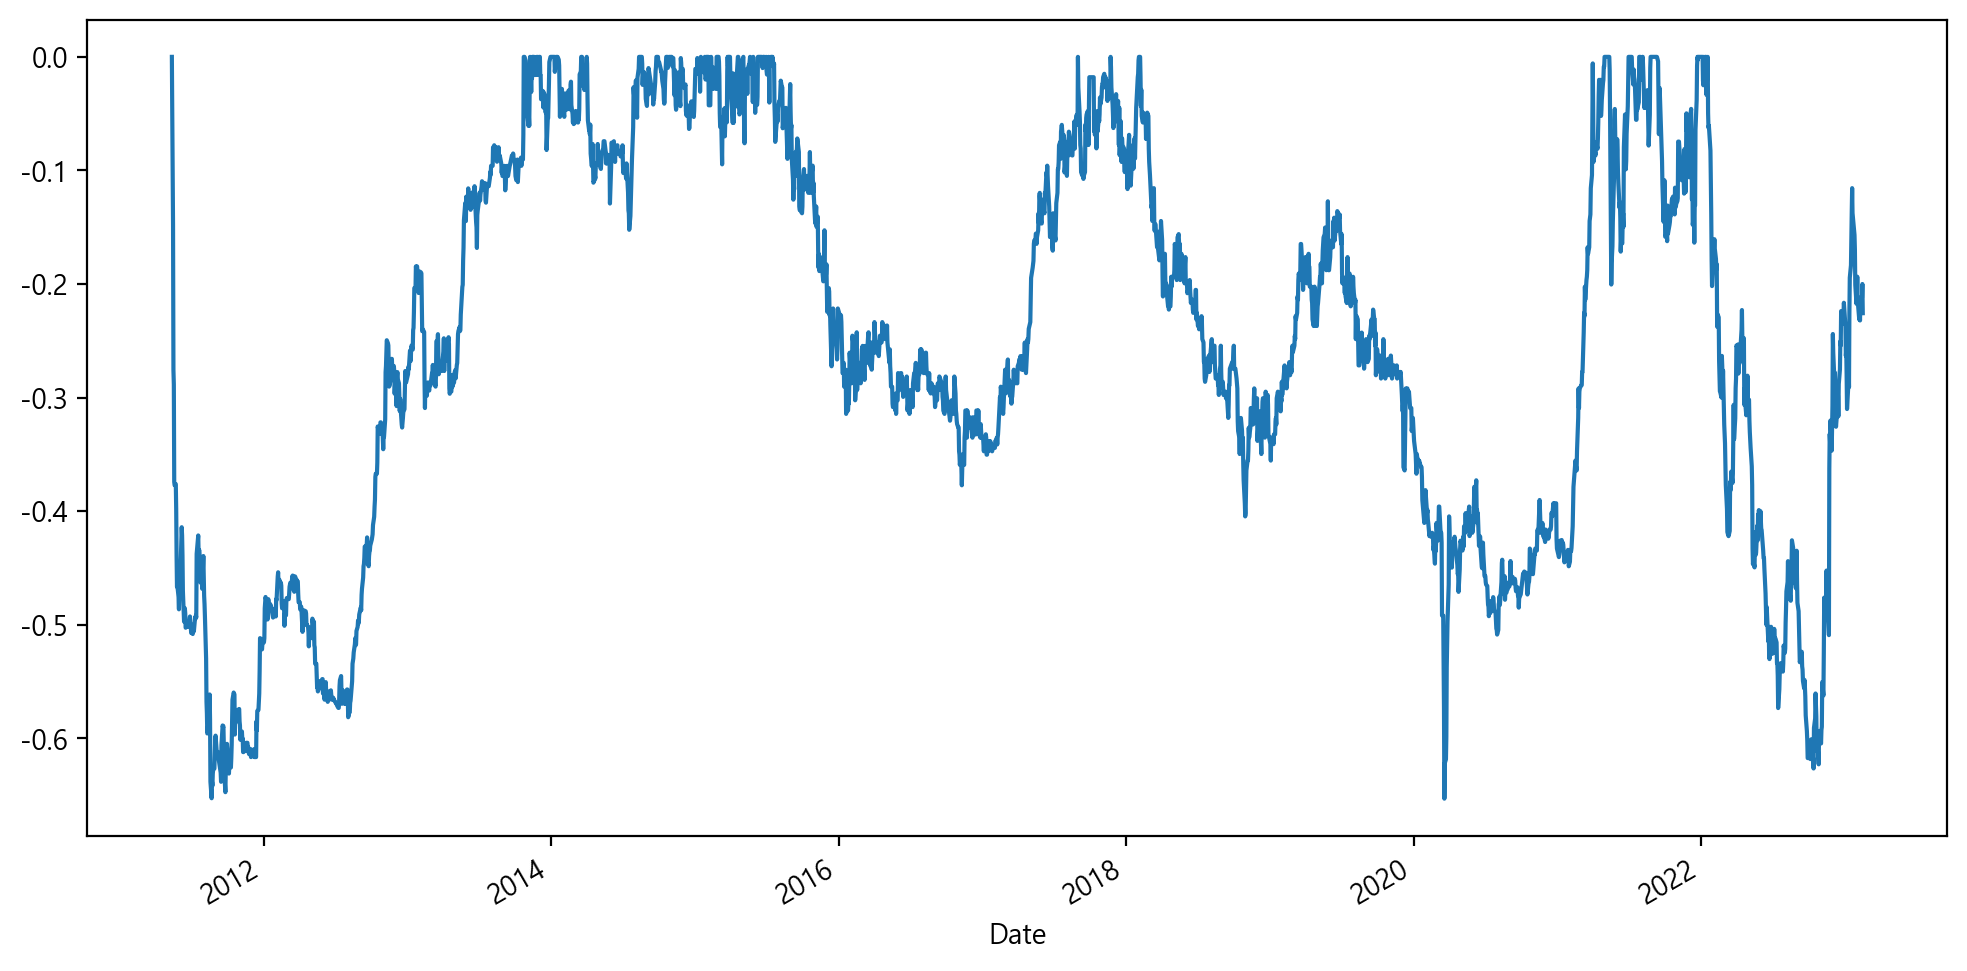

In [169]:
df['최대값에서하락율'].plot(figsize=(12, 6))

<AxesSubplot: xlabel='Date'>

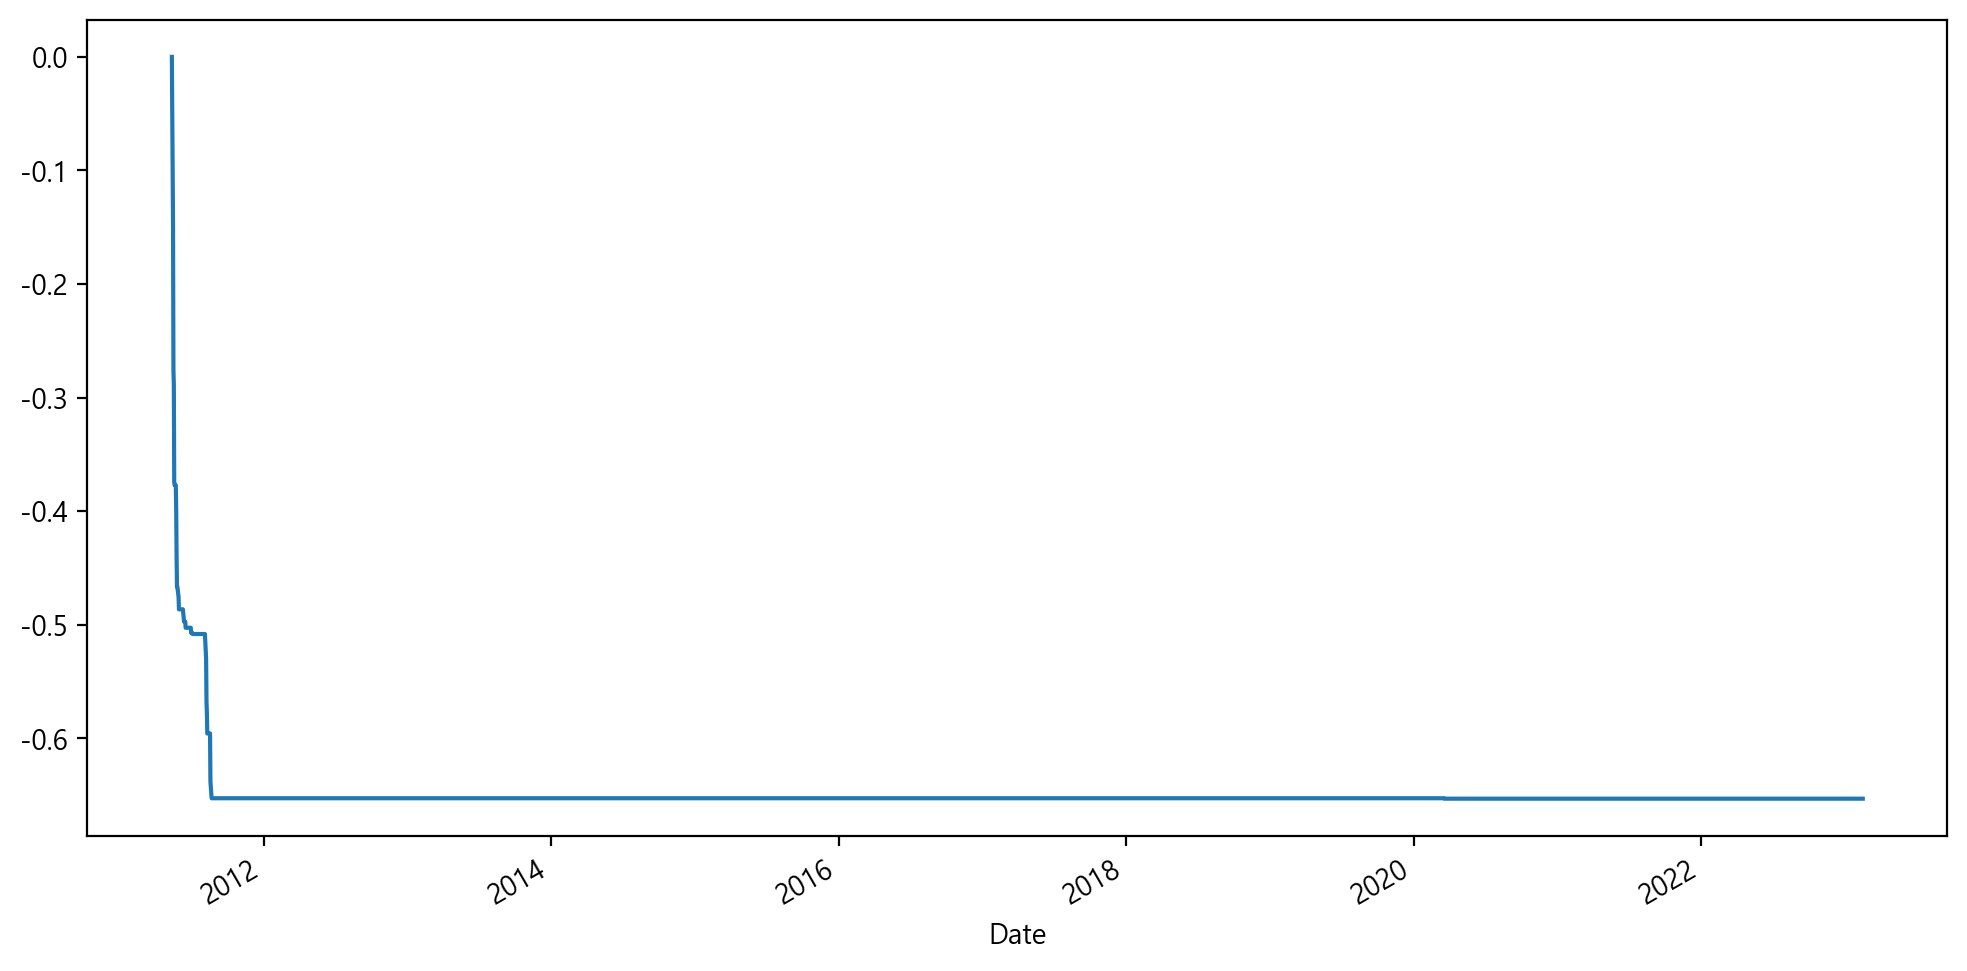

In [171]:
# df['최대값에서하락율']컬럼을 가지고 누적 최소값을 구해 고점대비 최대하락율(MDD)을 구함

df['MDD'] = df['최대값에서하락율'].cummin()
df['MDD'].plot(figsize=(12, 6))

In [179]:
MDD = df['MDD'].iloc[-1]

### 3. 변동성

In [173]:
# 변동성 : 표준편차 : risk

std = df['Change'].std()
std

0.022934834237898057

In [174]:
# 위 표준편차를 분산으로 치환함

import numpy as np
VOL = std * np.sqrt(252)
VOL

0.3640792065238071

### 4. 샤프 지수

"샤프비율(Sharp Ratio) = (포트폴리오 기대수익률 - 무위험이자율) / 변동성(리스크)"
 - 샤프 비율이 높을 수록 더 적은 위험으로 더 높은 수익률을 낼 수 있다.
 - 샤프 지수가 높은 종목이 좋은 종목 / 좋은 포트 폴리오
 - 샤프 비율이 0이상이어야 투자 대상, 1이상인 경우 괜찮은 투자라고 본다.

In [175]:
# Sharp Ratio = (포트폴리오 기대수익률 - 무위험이자율) / 변동성(리스크)

In [176]:
무위험이자율 = 0.035    # 한국 기준 금리를 대입

In [178]:
# 위에서 구한 연복리수익률(CAGR) : 포트폴리오 기대수익률, 위에서 구한 변동성(risk, VOL)

Sharp_Ratio = (CAGR - 무위험이자율) / VOL
Sharp_Ratio

0.4363877945476945

In [180]:
# 정리

print(f'연복리수익률 : {round(CAGR * 100, 2)}%')
print(f'샤프지수 : {round(Sharp_Ratio, 2)}%')
print(f'변동성 : {round(VOL * 100, 2)}%')
print(f'최대하락율 : {round(abs(MDD) * 100, 2)}%')

연복리수익률 : 19.39%
샤프지수 : 0.44%
변동성 : 36.41%
최대하락율 : 65.32%


## 포트폴리오

In [182]:
!pip install finance-datareader

In [9]:
import FinanceDataReader as fdr

In [10]:
import pandas as pd

In [11]:
df_krx = fdr.StockListing('KRX')[['Code', 'Name']]
df_krx.head()

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,006400,삼성SDI


In [12]:
cor_list = ['삼성전자', '고려아연', '두산밥캣', 'NAVER']

In [13]:
cor_df = df_krx[df_krx['Name'].isin(cor_list)]
cor_df

,Code,Name
0,005930,삼성전자
8,035420,NAVER
28,010130,고려아연
87,241560,두산밥캣


In [14]:
result = pd.DataFrame()
for idx, values in cor_df.iterrows():
    df = fdr.DataReader(values['Code'], '2018')
    df['Name'] = values['Name']
    result = pd.concat([result, df])

In [15]:
result['Name'].unique()

array(['삼성전자', 'NAVER', '고려아연', '두산밥캣'], dtype=object)

In [16]:
result.head()

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,삼성전자
2018-01-03,52540,52560,51420,51620,200270,0.011760,삼성전자
2018-01-04,52120,52180,50640,51080,233909,-0.010461,삼성전자
2018-01-05,51300,52120,51200,52120,189623,0.020360,삼성전자
2018-01-08,52400,52520,51500,52020,167673,-0.001919,삼성전자


In [17]:
Changes = pd.pivot_table(index = result.index, columns = 'Name', values = 'Change', data = result)
Changes

Name,NAVER,고려아연,두산밥캣,삼성전자
Date,,,,
2018-01-02,0.017240,0.013185,0.008380,0.001177
2018-01-03,-0.015819,-0.024024,0.004155,0.011760
2018-01-04,0.025257,-0.013333,-0.020690,-0.010461
2018-01-05,0.016796,0.017672,0.007042,0.020360
2018-01-08,0.046256,0.019408,-0.015385,-0.001919
...,...,...,...,...
2023-02-10,0.000000,0.013084,0.004054,-0.003175
2023-02-13,-0.030435,-0.011070,-0.002692,0.001592
2023-02-14,0.004484,0.003731,0.010796,0.004769


In [21]:
# 누적수익률

cum_ror_df = (Changes + 1).cumprod() - 1
cum_ror = cum_ror_df.iloc[-1]
cum_ror

Name
NAVER    0.265445
고려아연     0.123732
두산밥캣     0.044693
삼성전자     0.236264
Name: 2023-02-16 00:00:00, dtype: float64

In [22]:
# 투자년도를 계산

start_date = Changes.index[0]
end_date = Changes.index[-1]

year = (end_date - start_date).days / 365            # 휴일까지 포함하므로 365를 나눠줌
print(year)

5.126027397260274


In [23]:
# 연복리수익률

CAGR = (1 + cum_ror) ** (1 / year) - 1
print(CAGR)

Name
NAVER    0.046998
고려아연     0.023018
두산밥캣     0.008566
삼성전자     0.042244
Name: 2023-02-16 00:00:00, dtype: float64


In [29]:
# 연표준편차

daily_std = Changes.std()                # 일 표준편차
annual_std = daily_std * np.sqrt(252)    # 연 표준편차
print(daily_std, annual_std)

Name
NAVER    0.022250
고려아연     0.019969
두산밥캣     0.026300
삼성전자     0.016354
dtype: float64 Name
NAVER    0.353211
고려아연     0.317002
두산밥캣     0.417503
삼성전자     0.259615
dtype: float64


In [25]:
# # 연평균수익률, 공분산_일, 공분산_년

# 연평균수익률 = Changes.mean() * 252
# 공분산_일 = Changes.cov()
# 공분산_년 = 공분산_일 * 252

# print(연평균수익률, 공분산_일, 공분산_년)

In [30]:
# 종목이 4 -> 100%
# 경우의 수가 많다. ->

# 전체 비중이 100%을 넘으면 안된다.
# 우리가 계산해야할 경우의 수는 많다.

포트폴리오_비중_리스트 = []
포트폴리오_수익률_리스트 = []
포트폴리오_리스크_리스트 = []

import numpy as np

for i in range(20000):
    # 포트폴리오의 비중
    weights = np.random.random(4)
    비중 = weights / weights.sum()
    # 포트폴리오의 수익률
    포트폴리오_수익률 = (CAGR * 비중).sum()
    # 포트폴리오의 리스크
    리스크 = (annual_std * 비중).sum()
    
    포트폴리오_비중_리스트.append(비중)
    포트폴리오_수익률_리스트.append(포트폴리오_수익률)
    포트폴리오_리스크_리스트.append(리스크)


In [32]:
# 각 종목을 데이터프레임에 넣기

포트폴리오 = pd.DataFrame(포트폴리오_비중_리스트)
포트폴리오.columns = Changes.columns             # 포트폴리오 데이터프레임 columns명을 종목명으로 변경하기
포트폴리오.head()

Name,NAVER,고려아연,두산밥캣,삼성전자
0,0.036522,0.239218,0.334885,0.389375
1,0.299003,0.227483,0.152995,0.320519
2,0.315247,0.180087,0.154321,0.350346
3,0.331378,0.291446,0.116733,0.260443
4,0.186641,0.162059,0.378678,0.272623


In [33]:
# 포트폴리오수익률과 리스크 데이터프레임에 넣기

포트폴리오['수익률'] = 포트폴리오_수익률_리스트
포트폴리오['리스크'] = 포트폴리오_리스크_리스트
포트폴리오.head()

Name,NAVER,고려아연,두산밥캣,삼성전자,수익률,리스크
0,0.036522,0.239218,0.334885,0.389375,0.026540,0.329636
1,0.299003,0.227483,0.152995,0.320519,0.034139,0.324811
2,0.315247,0.180087,0.154321,0.350346,0.035083,0.323821
3,0.331378,0.291446,0.116733,0.260443,0.034285,0.325787
4,0.186641,0.162059,0.378678,0.272623,0.027262,0.346173


<AxesSubplot: xlabel='수익률', ylabel='리스크'>

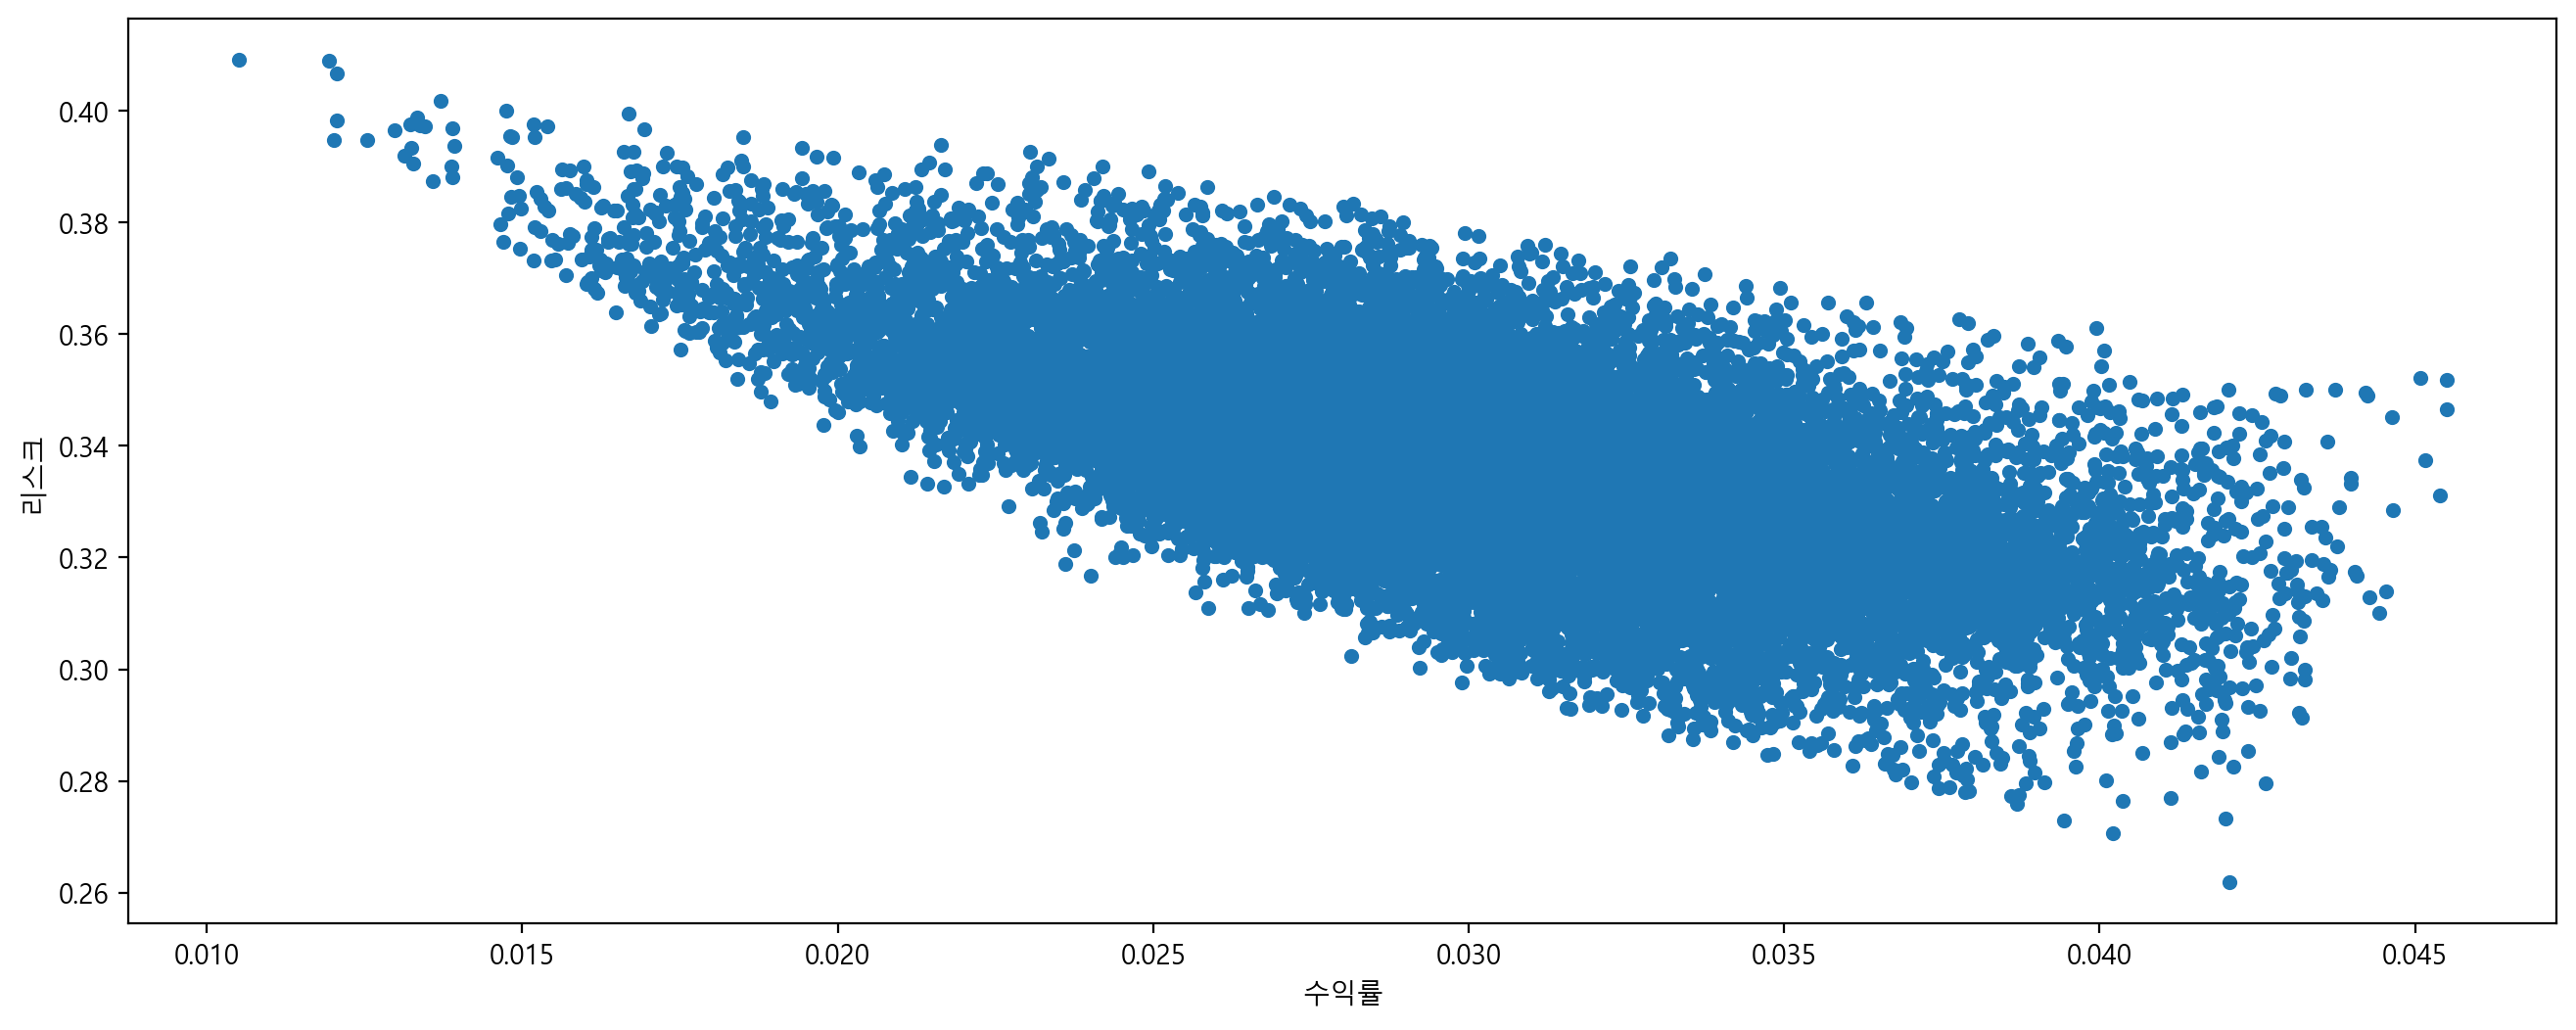

In [36]:
# 데이터프레임 시각화 하기

포트폴리오.plot.scatter(x = '수익률', y = '리스크', figsize = (16, 6))